# Data Cleaning and EDA

In this notebook the Twitter data will be cleaned and assigned a subjectivity and polarity score using textblob's built in functions.  Once the data has been cleaned and assigned scores, it will be visualized and explored using wordcloud, frequency counts, and some basic histograms.

In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Load the data

In [2]:
# Load the before and after csv files
b4 = pd.read_csv('before.csv')
aftr = pd.read_csv('after.csv')

In [3]:
# Compare the number of tweets in each file
print(b4.shape[0])
print(aftr.shape[0])

39988
39999


In [4]:
# Assign the two dataframes to a list for easier cleaning
dfs = [b4, aftr]

## Define functions

In [5]:
def clean(tweet):
    '''Remove usernames, symbols, and extra spaces. Encode the tweet using ascii encoding and ignoring errors.
    Then decode and return a unicode string.'''
    tweet = re.sub('@[^\s]+',' ',tweet) # remove usernames by removing any word that begins with '@'
    tweet = re.sub(r'[^\w]', ' ', tweet) # remove other symbols such as !#$%^...
    tweet = re.sub(r'http\S+', ' ', tweet) # remove URLs
    tweet = ' '.join(tweet.split()) # remove extra spaces so each word is separated by only one space
    return str(tweet).encode('ascii', 'ignore').decode('UTF-8') # encode and decode

def get_subjectivity(tweet):
    '''Score the subjectivity of a tweet, rounded to 2 decimal points.'''
    return round(TextBlob(tweet).sentiment.subjectivity, 2)

def get_polarity(tweet):
    '''Score the polarity of a tweet, rounded to 2 decimal points.'''
    return round(TextBlob(tweet).sentiment.polarity, 2)

## Data cleaning

In [6]:
# Clean the tweets in each dataframe
for df in dfs:
    df['text'] = df['text'].apply(clean)

In [7]:
# Separate tweets into lists of words
for df in dfs:
    df['text'] = df['text'].str.split()

In [8]:
# Remove stopwords
sw = stopwords.words('english')
sw.append('RT') # add 'RT' so all indications of a retweet are removed
for df in dfs:
    df['text'] = df['text'].apply(lambda x: [word for word in x if word not in sw])

In [9]:
# Put word lists back into string
for df in dfs:
    for i in range(df.shape[0]):
        df['text'][i] = ' '.join(df['text'][i])

<ipython-input-9-4a76b6d0d2f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i] = ' '.join(df['text'][i])


In [10]:
# Add columns for subjectivity and polarity
for df in dfs:
    df['subjectivity'] = df['text'].apply(get_subjectivity)
    df['polarity'] = df['text'].apply(get_polarity)
    df.drop(df[df['polarity'] == 0].index, inplace=True)
    df.drop_duplicates(subset='text', keep='first', inplace=True)

## EDA

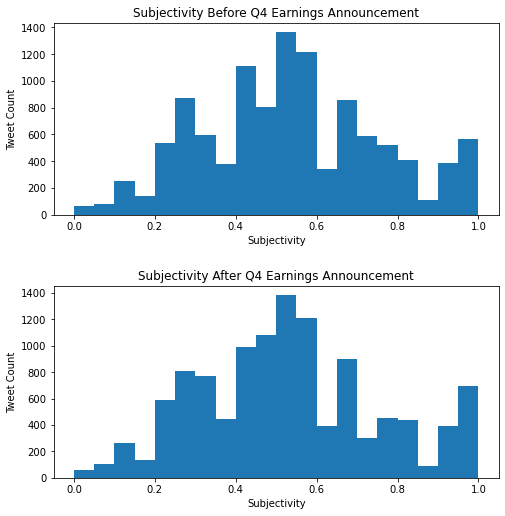

In [11]:
# Plot subjectivity of each dataframe
fig, ax = plt.subplots(2, 1, figsize=(8,8))
plt.tight_layout(pad=5)

ax[0].hist(dfs[0]['subjectivity'], bins=20)
ax[0].set_title('Subjectivity Before Q4 Earnings Announcement')
ax[0].set_xlabel('Subjectivity')
ax[0].set_ylabel('Tweet Count')

ax[1].hist(dfs[1]['subjectivity'], bins=20)
ax[1].set_title('Subjectivity After Q4 Earnings Announcement')
ax[1].set_xlabel('Subjectivity')
ax[1].set_ylabel('Tweet Count');

The subjectivity plots are very similar, with the same overall shape.  The subjectivity scores here are just a measure of how much a tweet may have been influenced by personal feelings, tastes, or opinions.  It appears that tweets about Tesla were about as subjective before the Q4 2021 earnings announcement as they were after.

What about polarity?

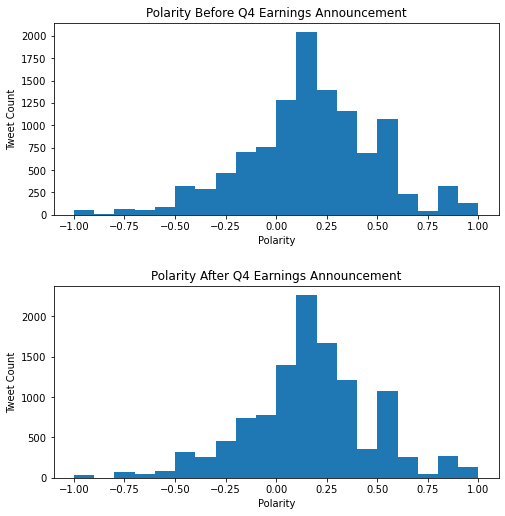

In [12]:
# Plot polarity of each dataframe
fig, ax = plt.subplots(2, 1, figsize=(8,8))
plt.tight_layout(pad=5)

ax[0].hist(dfs[0]['polarity'], bins=20)
ax[0].set_title('Polarity Before Q4 Earnings Announcement')
ax[0].set_xlabel('Polarity')
ax[0].set_ylabel('Tweet Count')

ax[1].hist(dfs[1]['polarity'], bins=20)
ax[1].set_title('Polarity After Q4 Earnings Announcement')
ax[1].set_xlabel('Polarity')
ax[1].set_ylabel('Tweet Count');

Just like subjectivity, the polarity of the tweets before and after the 2021 Q4 earnings were announced are very similar.  

In [13]:
print(dfs[0].describe())
print(dfs[1].describe())

                 id  subjectivity      polarity
count  1.119800e+04  11198.000000  11198.000000
mean   1.484589e+18      0.532215      0.178973
std    4.789686e+13      0.223828      0.322279
min    1.484503e+18      0.000000     -1.000000
25%    1.484548e+18      0.380000      0.010000
50%    1.484587e+18      0.500000      0.200000
75%    1.484628e+18      0.700000      0.400000
max    1.484677e+18      1.000000      1.000000
                 id  subjectivity      polarity
count  1.148400e+04  11484.000000  11484.000000
mean   1.486673e+18      0.526675      0.171599
std    6.555419e+13      0.226634      0.310142
min    1.486542e+18      0.000000     -1.000000
25%    1.486621e+18      0.370000      0.020000
50%    1.486688e+18      0.500000      0.180000
75%    1.486731e+18      0.670000      0.350000
max    1.486761e+18      1.000000      1.000000


What are the most common words in each set of data?

In [14]:
b4 = ' '.join(text.split()[0] for text in dfs[0]['text'])
aftr = " ".join(text.split()[0] for text in dfs[1]['text'])

In [15]:
wc_b4 = WordCloud(collocations = False, background_color = 'black').generate(b4)
wc_aftr = WordCloud(collocations = False, background_color = 'black').generate(aftr)

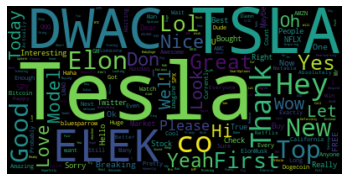

In [16]:
plt.imshow(wc_b4, interpolation='bilinear')
plt.axis("off")
plt.show()

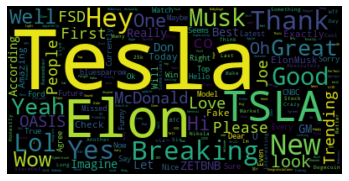

In [17]:
plt.imshow(wc_aftr, interpolation='bilinear')
plt.axis("off")
plt.show()